In [2]:
import pandas as pd
import numpy as np
from numpy import reshape
from sklearn.linear_model import LinearRegression
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
import math 
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [3]:
from google.colab import files 
uploaded = files.upload()

Saving temps.csv to temps.csv


In [4]:
arquivo = pd.read_csv("temps.csv")
arquivo

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [5]:
labelencoder = LabelEncoder()
arquivo['week']= labelencoder.fit_transform(arquivo.week)

In [6]:
from sklearn.model_selection import TimeSeriesSplit
X_train, X_test, y_train, y_test = train_test_split(arquivo, arquivo.actual, test_size = 0.20, shuffle=False)

In [7]:
TimeSeriesSplit()
tscv = TimeSeriesSplit(n_splits=2)
X = arquivo.drop(columns = "actual")
for train_index, test_index in tscv.split(X_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = arquivo.actual[train_index], arquivo.actual[test_index]

In [8]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
count = 0
scoremeans = []
for count in range(30):
  #tree_model = tree.DecisionTreeRegressor(max_depth=count)
  #score = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='accuracy')
  regressor = tree.DecisionTreeRegressor(random_state=0, max_depth=1+count)
  score = cross_val_score(regressor, X_train, y_train, cv=10)
  print("profundidade:", 1+count, ", score:",score ,"media:", score.mean(), "\n")
  scoremeans.append((1+count, score.mean()))


In [10]:
i = 0
depth = scoremeans[i][1]
for i in range(len(scoremeans)-1):
  if scoremeans[i][1]>scoremeans[i+1][1]:
    depth = scoremeans[i][0]

print("depth",depth)
    
dtc = tree.DecisionTreeRegressor(max_depth=depth).fit(X_train, y_train)
a_train = dtc.score(X_train, y_train)
a_test = dtc.score(X_test, y_test)
print('Accuracy, Training Set: ', round(a_train*100,5), '%')
print('Accuracy, Test Set: ', round(a_test*100,5), '%')

depth 11
Accuracy, Training Set:  99.94542 %
Accuracy, Test Set:  -6.32256 %


In [ ]:
text_representation = tree.export_text(dtc)
print(text_representation)

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, filled=True)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(random_state=0, max_depth=30)
tree2 = tree1.fit(X_train, y_train)
pred_y = tree2.predict(X_test)
for i in range(len(pred_y)):
  print(pred_y[i], y_test.to_numpy()[i])

In [14]:
errors = abs(pred_y - y_test)
mape = 100 * (errors / y_test)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 92.55 %


5. Exiba a predição e os dados reais (eixo y) vs a data (eixo x)

In [ ]:
from datetime import date

list_date = []

for i in arquivo.index:
    list_date.append(date(arquivo['year'][i],arquivo['month'][i],arquivo['day'][i]))
        
arquivo['date'] = list_date
arquivo

In [16]:
arquivo.shape

(348, 13)

In [17]:
pred_y.shape

(92,)

In [ ]:
from datetime import date, timedelta

date_list = [date(2016,10,31) - timedelta(days=x) for x in range(92)]
date_list

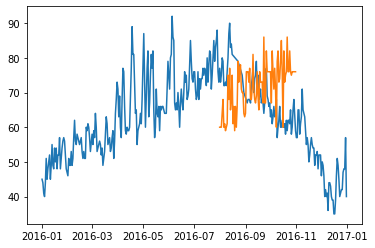

In [19]:
plt.plot(arquivo['date'],arquivo['actual'])
plt.plot(date_list,pred_y)

RECOMEÇANDO PARA FAZER RANDOM FOREST



In [33]:
from sklearn.model_selection import TimeSeriesSplit
X_train, X_test, y_train, y_test = train_test_split(arquivo, arquivo.actual, test_size = 0.20, shuffle=False)

In [38]:
TimeSeriesSplit()
tscv = TimeSeriesSplit(n_splits=2)
X = arquivo.drop(columns = ["actual", "date"])
for train_index, test_index in tscv.split(X_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = arquivo.actual[train_index], arquivo.actual[test_index]

In [39]:
from sklearn import ensemble # importa o pacote ensemble

model = ensemble.RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
count = 0
scoremeans1 = []
for count in range(30):
  
  regressor1 = ensemble.RandomForestRegressor(n_estimators=1+count)
  score1 = cross_val_score(regressor1, X_train, y_train, cv=10)
  print("profundidade:", 1+count, ", score:",score ,"media:", score1.mean(), "\n")
  scoremeans1.append((1+count, score1.mean()))

In [50]:
i = 0
depth1 = scoremeans1[i][1]
for i in range(len(scoremeans1)-1):
  if scoremeans1[i][1]>scoremeans1[i+1][1]:
    depth1 = scoremeans1[i][0]

print("depth",depth1)
    
rfr = ensemble.RandomForestRegressor(n_estimators=depth).fit(X_train, y_train)
aa_train = rfr.score(X_train, y_train)
aa_test = rfr.score(X_test, y_test)
print('Accuracy, Training Set: ', round(aa_train*100,5), '%')
print('Accuracy, Test Set: ', round(aa_test*100,5), '%')

depth 29
Accuracy, Training Set:  96.37997 %
Accuracy, Test Set:  16.48994 %


In [ ]:
from datetime import date, timedelta

date_list = [date(2016,10,31) - timedelta(days=x) for x in range(62)]
date_list

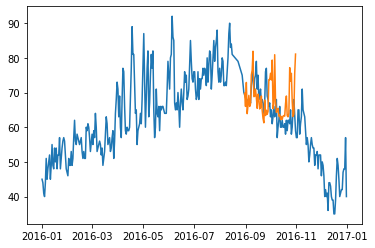

In [52]:
pred_y = rfr.predict(X_test)
plt.plot(arquivo['date'],arquivo['actual'])
plt.plot(date_list,pred_y)

Compare com o resultado anterior utilizando apenas uma árvore

In [ ]:
rfr = ensemble.RandomForestRegressor(n_estimators=1).fit(X_train, y_train)
aa_train = rfr.score(X_train, y_train)
aa_test = rfr.score(X_test, y_test)
print('Accuracy, Training Set: ', round(aa_train*100,5), '%')
print('Accuracy, Test Set: ', round(aa_test*100,5), '%')

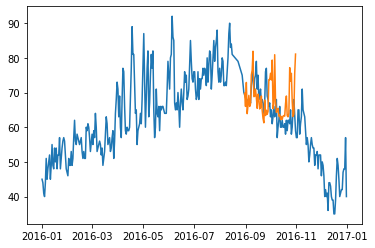

In [53]:
pred_y = rfr.predict(X_test)
plt.plot(arquivo['date'],arquivo['actual'])
plt.plot(date_list,pred_y)